In [1]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [2]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
#from tensorflow.nn.rnn import *
from tensorflow.python.ops  import *

%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.python.framework import dtypes

import seaborn as sns

In [4]:
# Let's first load the data and take a look at what we have.
df = pd.read_csv('/home/shreevidya/Data/combined_copy.csv')
df.drop(['To.Date'], axis=1, inplace=True)

df['From.Date'] = pd.to_datetime(df['From.Date'], format='%d-%m-%Y %H:%M')
df['From.Date'] = df['From.Date'].astype(object)

n = df.shape[0]
years = np.empty(n, dtype=int)
months = np.empty(n, dtype=int)
weeks = np.empty(n, dtype=int)
days = np.empty(n, dtype=int)
hours = np.empty(n, dtype=int)

for index, row in df.iterrows():
    years[index] = row['From.Date'].year
    months[index] = row['From.Date'].month
    weeks[index] = row['From.Date'].week
    days[index] = row['From.Date'].day
    hours[index] = row['From.Date'].hour

df['year'] = years
df['month'] = months
df['week'] = weeks
df['day'] = days
df['hour'] = hours
df.rename(columns={'From.Date':'Date'}, inplace=True)
df.rename(columns={'PM2.5':'PM'}, inplace=True)
df = df.reindex(columns=['Date', 'year', 'month', 'week', 'day', 'hour', 'PM', 'Temp', 'RH', 'BP', 'WS', 'WD'])

df = df[df['PM'].notna()]
df = df[df['PM'] < 250]

print(df.head())
print(df.columns)
df.dtypes

                  Date  year  month  week  day  hour     PM   Temp     RH  \
0  2018-07-01 00:00:00  2018      7    26    1     0  16.75  24.18  77.39   
1  2018-07-01 01:00:00  2018      7    26    1     1  21.00  23.94  78.98   
2  2018-07-01 02:00:00  2018      7    26    1     2  19.50  23.75  80.74   
3  2018-07-01 03:00:00  2018      7    26    1     3  25.25  23.59  81.87   
4  2018-07-01 04:00:00  2018      7    26    1     4  31.00  23.47  81.64   

        BP    WS      WD  
0  1022.10  0.43  224.88  
1  1022.48  0.64  217.85  
2  1022.90  0.61  224.73  
3  1023.20  0.49  225.78  
4  1023.17  0.48  240.66  
Index(['Date', 'year', 'month', 'week', 'day', 'hour', 'PM', 'Temp', 'RH',
       'BP', 'WS', 'WD'],
      dtype='object')


Date      object
year       int64
month      int64
week       int64
day        int64
hour       int64
PM       float64
Temp     float64
RH       float64
BP       float64
WS       float64
WD       float64
dtype: object

In [5]:
x_axis = df['Date'] # collect date from data frame

In [6]:
x_axis = pd.to_datetime(x_axis) # convert to date time

In [7]:
Target = df[['PM']].copy(deep=True) # copy PM10 data out from data sets

In [8]:
Target.shape

(155519, 1)

In [9]:
null_data_PM = Target[Target.isnull().any(axis=1)] # extract data sets with null values

In [10]:
null_data_PM.to_csv("PM_NUll.txt")# save to file

In [11]:
Target.to_csv("R_target.csv")# save to file

In [12]:
null_data_PM.head()

,PM


In [13]:
def getPctMissing(series):
    '''
    Returns percentage of Missing data in a data set.
    Input : Pandas series
    Output: Percentage of missing data in data set
    '''
    num = series.isnull().sum()
    Total_data = len(series)
    return 100*(num/Total_data)

In [14]:
print("Number of null values in PM : ");Target.isnull().sum()

Number of null values in PM : 


PM    0
dtype: int64

In [15]:
print("Number of non null values in PM : ");Target.count()

Number of non null values in PM : 


PM    155519
dtype: int64

In [16]:
print("Percentage of Missing Value: "); getPctMissing(Target)

Percentage of Missing Value: 


PM    0.0
dtype: float64

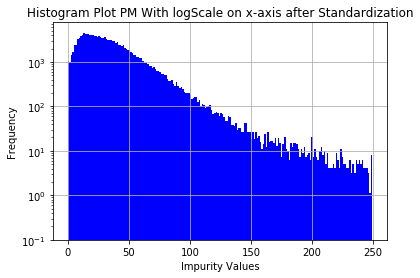

In [17]:
fig, ax = plt.subplots()
df.PM.hist(ax=ax,bins=200,color='blue',bottom=0.1)
ax.set_yscale('log')
#ax.set_yscale('log')
#ax.set_xscale('log')
#plt.hist(PM10_cox, bins='auto')  # plt.hist passes it's arguments to np.histogram

plt.title("Histogram Plot PM With logScale on x-axis after Standardization")
plt.ylabel("Frequency")
plt.xlabel("Impurity Values")
plt.show()

In [18]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries,  autolag='BIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

/home/shreevidya/anaconda3/envs/tfv2/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


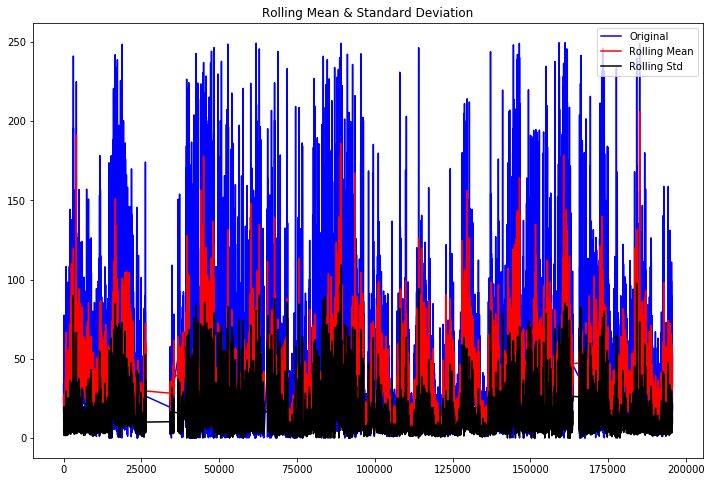

Results of Dickey-Fuller Test:
Test Statistic                -1.691543e+01
p-value                        1.003264e-29
#Lags Used                     7.300000e+01
Number of Observations Used    1.554450e+05
Critical Value (1%)           -3.430392e+00
Critical Value (5%)           -2.861559e+00
Critical Value (10%)          -2.566780e+00
dtype: float64


In [19]:
test_stationarity(Target.PM) 

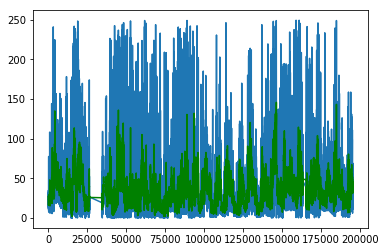

In [20]:
Weighted_moving_avg = pd.DataFrame.ewm(Target.PM, halflife=12).mean()
plt.plot(Target.PM)
plt.plot(Weighted_moving_avg, color='green')

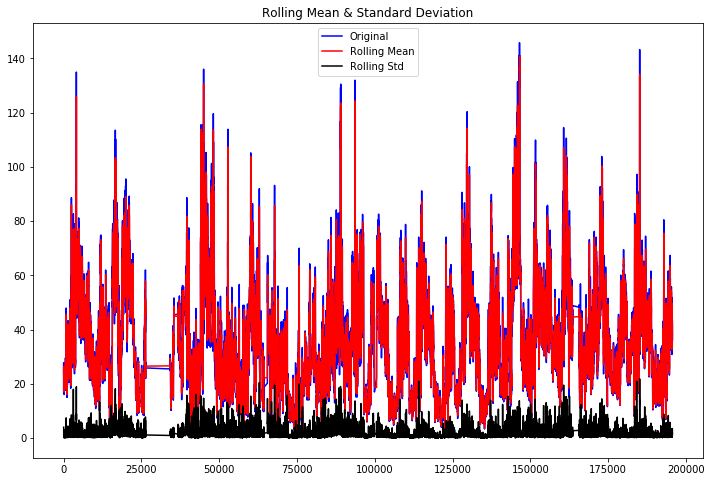

Results of Dickey-Fuller Test:
Test Statistic                -1.507684e+01
p-value                        8.566257e-28
#Lags Used                     7.400000e+01
Number of Observations Used    1.554440e+05
Critical Value (1%)           -3.430392e+00
Critical Value (5%)           -2.861559e+00
Critical Value (10%)          -2.566780e+00
dtype: float64


In [21]:
test_stationarity(Weighted_moving_avg) 

In [22]:
Target_tr = Target.copy(deep=True)

In [23]:
Target_tr['Date']= x_axis

In [24]:
Target_tr[1:2]

,PM,Date
1,21.0,2018-07-01 01:00:00


In [25]:
Target_tr.dtypes

PM             float64
Date    datetime64[ns]
dtype: object

In [26]:
Target_tr.set_index('Date',inplace=True); # set date as the index
                                          # this is important step in arima model

In [27]:
Target_tr[1:2]

,PM
Date,
2018-07-01 01:00:00,21.0


In [28]:
#del Target_tr.index.name # delete index name

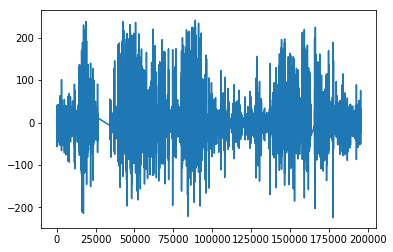

In [29]:
Target_diff = Target - Target.shift()
Target_diff.fillna(0,inplace=True)
plt.plot(Target_diff)

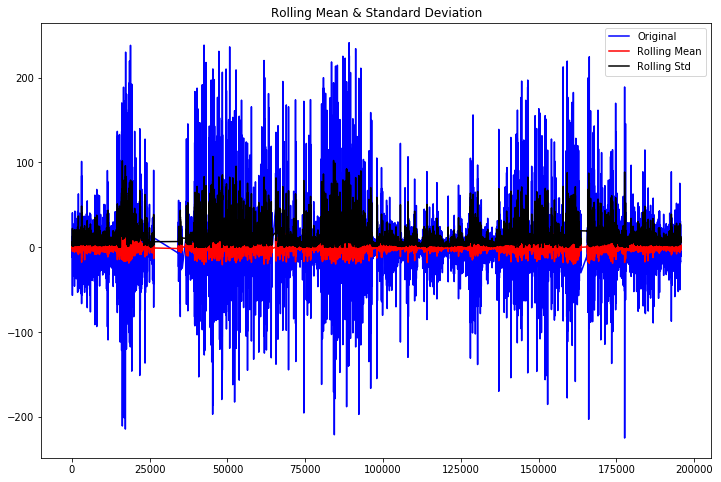

Results of Dickey-Fuller Test:


In [ ]:
test_stationarity(Target_diff.PM)# the difference was very important in detrending as test statistics is now greater than
                                    #critical value

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(Target_tr.PM,freq=2000)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(Target_tr.PM, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [ ]:
import statsmodels.api as sm  
import warnings
warnings.simplefilter(action = "ignore")
Target_tr.PM.interpolate(inplace=True)  
result = sm.tsa.seasonal_decompose(Target_tr.PM,freq=2000)  
fig = plt.figure()  
fig = result.plot()
# The residual is almost same trend as the data set
# Therefore we can just use the data set directly and not the residual

In [ ]:
Target_tr_diff = Target_tr - Target_tr.shift()

In [ ]:
Target_tr_diff.fillna(0,inplace=True)

In [ ]:
from statsmodels.tsa.stattools import acf, pacf
lag_pacf = pacf(Target_tr_diff[0:500], nlags=200, method='ols')
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-20.96/np.sqrt(len(Target_tr)),linestyle='--',color='gray')
plt.axhline(y=20.96/np.sqrt(len(Target_tr)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [ ]:
lag_acf = acf(Target_tr_diff[0:500], nlags=200)
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(Target_tr_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(Target_tr_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(Target_tr_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(Target_tr_diff)),linestyle='--',color='gray')
fig = sm.graphics.tsa.plot_acf(Target_tr, lags=50, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(Target_tr, lags=50, ax=ax2)

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
Train = Target_tr[:-24].copy(deep=True)

In [ ]:
Test = Target_tr[-24:].copy(deep=True)

In [ ]:
Target_tr.shape

In [ ]:
Train_diff = Train- Train.shift()

In [ ]:
Train_diff.shape

In [ ]:
Train_diff.dropna(inplace=True);
#del Train_diff.index.name # 
#del Train.index.name

In [ ]:
Train_diff.shape

In [ ]:
Train.head()

In [ ]:
model = ARIMA(Train.values, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
#plt.plot(Train_diff.values)
print(results_AR.summary())
#plt.plot(results_AR.fittedvalues, color='red')
#locs, labels = plt.xticks()
#plt.setp(labels, rotation=90)
#plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-Train_diff.values)**2))

In [ ]:
model = ARIMA(Train, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(Train_diff)
print(results_MA.summary())
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-Train_diff.PM)**2))

In [ ]:
start_param =np.mean(Train.values)

In [ ]:
### ARIMA model
model = ARIMA(Train, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
#plt.plot(Train_diff.values)
print(results_ARIMA.summary())
#plt.plot(results_ARIMA.fittedvalues, color='red')
#locs, labels = plt.xticks()
#plt.setp(labels, rotation=90)
#plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-Train_diff.values)**2))

In [ ]:
# Get back to base model

In [ ]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())

In [ ]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

In [ ]:
print(Target_tr)
predictions_ARIMA_log = pd.Series(Target_tr.PM, index=Target_tr.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

In [ ]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(Target_tr)
plt.plot(predictions_ARIMA_diff)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA_diff-Target_tr.PM)**2)/len(Target_tr)))

In [ ]:
#Predictions
#AR Model
#Output of forecast 3 array output to be interpreted as :

#forecast : array Array of out of sample forecasts

#stderr : array Array of the standard error of the forecasts.

#conf_int : array 2d array of the confidence interval for the forecast



In [ ]:
AutoregressiveModelForecast = results_AR.forecast(24)

In [ ]:
plt.rcParams["figure.figsize"] = (7,6)

plt.plot(AutoregressiveModelForecast[0],color='deepskyblue',label='Forecast AR') # Autoregressive model prediction for next 24 hours thats the 
plt.plot(AutoregressiveModelForecast[2],'r*',color='purple',label='Confidence Interval')
plt.plot(Target_tr.values[-24:],'--',color="crimson",label="Actual Value")
plt.title("AR FORECAST For Next 24 hours", fontweight="bold")
plt.xlabel("Time/hr",fontweight="bold" )
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.ylabel("PM2.5 Concentration",fontweight="bold")

In [ ]:
from sklearn.metrics import mean_squared_error 

In [ ]:
print("Mean Square error for Autoregressive model: ");mean_squared_error(AutoregressiveModelForecast[0],Test )**0.5 

In [ ]:
#Error plot for AR

In [ ]:
plt.plot(AutoregressiveModelForecast[1],'g-^')
plt.title("Error for Autoregressive model")
plt.ylabel("Error Value")
plt.xlabel("Time/hr")

In [ ]:
plt.plot(AutoregressiveModelForecast[2],'r-')
plt.title("Confidence interval for Autoregressive model")
plt.ylabel("Prediction")
plt.xlabel("Time/hr")

In [ ]:
#MA Model: Predictiom


In [ ]:
MovingAverageModelForecast = results_MA.forecast(24)

In [ ]:
plt.rcParams["figure.figsize"] = (7,6)
plt.plot(MovingAverageModelForecast[0],color='deepskyblue',label='Forecast AR') # Autoregressive model prediction for next 24 hours thats the 
plt.plot(MovingAverageModelForecast[2],'r*',color='purple',label='Confidence Interval')
plt.plot(Target_tr.values[-24:],'--',color="crimson",label="Actual Value")
plt.title("MA FORECAST For Next 24 hours", fontweight="bold")
plt.xlabel("Time/hr",fontweight="bold" )
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.ylabel("PM2.5 Concentration",fontweight="bold")

In [ ]:
plt.plot(MovingAverageModelForecast[0]) 
plt.title("Moving average prediction")
plt.xlabel("Time/hr")
plt.ylabel("PM2.5 value")

In [ ]:
print("Mean Square error for Moving Average model: ");mean_squared_error(MovingAverageModelForecast[0],Test )**0.5 

In [ ]:
plt.plot(MovingAverageModelForecast[2],'r-')
plt.title("Confidence interval for Moving Average model")
plt.ylabel("Prediction")
plt.xlabel("Time/hr")

In [ ]:
#SARIMA Model

In [ ]:
ArimaModelForecast = results_ARIMA.forecast(24)

In [ ]:
plt.rcParams["figure.figsize"] = (7,6)
plt.plot(ArimaModelForecast[0],color='deepskyblue',label='Forecast AR') # Autoregressive model prediction for next 24 hours thats the 
plt.plot(ArimaModelForecast[2],'r*',color='purple',label='Confidence Interval')
plt.plot(Target_tr.values[-24:],'--',color="crimson",label="Actual Value")
plt.title("ARIMA FORECAST For Next 24 hours", fontweight="bold")
plt.xlabel("Time/hr",fontweight="bold" )
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.ylabel("NO2 Concentration",fontweight="bold")

In [ ]:
plt.plot(ArimaModelForecast[0]) 
plt.title("ARIMA PM prediction")
plt.xlabel("Time/hr")
plt.ylabel("PM2.5 value")

In [ ]:
print("Mean Square error for  Arima model: ");mean_squared_error(ArimaModelForecast[0],Test )**0.5 

In [ ]:
plt.plot(ArimaModelForecast[2],'r-')
plt.title("Confidence interval for Arima model")
plt.ylabel("Prediction")
plt.xlabel("Time/hr")

In [ ]:
#Compute Rsquared¶

In [ ]:
import scipy
def rsquared(x, y):
    """ Return R^2 where x and y are array-like."""
    
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
    return r_value**2

In [ ]:
print("R-squared for Arima")
rsquared(Test.PM.values,ArimaModelForecast[0])

In [ ]:
print("R-squared for Moving Average")
rsquared(Test.PM.values,MovingAverageModelForecast[0])

In [ ]:
print("R-squared for AR model")
rsquared(Test.PM.values,AutoregressiveModelForecast[0])

In [ ]:
plt.plot(AutoregressiveModelForecast[0])
plt.title("Prediction graph")
plt.ylabel("Prediction")
plt.xlabel("Time/hr")

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [ ]:
global_step = tf.Variable(0, trainable=False)
starter_learning_rate = 0.1
learning_rate = tf.train.exponential_decay(starter_learning_rate, global_step,
                                           1, 0.96, staircase=True)
k = tf.Variable([3.4,3.4])
l = tf.mul(k,k) 
l=tf.train.GradientDescentOptimizer(learning_rate).minimize(l)

In [ ]:
sess=tf.Session()
init= tf.initialize_all_variables()
sess.run(init)
for i in range(5):
    print(sess.run(learning_rate))
    #sess.run(learning_rate.eval(session=sess))
    print(sess.run(l))
    